In [1]:
from model_autoencoder import Autoencoder
from dataset import Dataset
import torch
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.metrics import roc_curve, auc, recall_score, accuracy_score, precision_score, f1_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.io import read_image
from utils import *
from config import *

In [2]:
model = Autoencoder()
model.load_state_dict(torch.load("/fhome/mapsiv01/PSIV3_malaltia/autoencoder/models/model5_AUTOENCODER.pth", map_location=torch.device('cpu')))

metadata = pd.read_csv(METADATA_FILE)
window_metadata = pd.read_csv(WINDOW_METADATA_FILE)
directories = [dir.path for dir in os.scandir(ANNOTATED_PATCHES_DIR) if dir.is_dir()]
directories_cr = [dir.path for dir in os.scandir(CROPPED_PATCHES_DIR) if dir.is_dir()]

In [3]:
transform = transforms.Compose([
    transforms.Resize((64, 64), antialias=True),
    transforms.Normalize(mean=[0.5], std=[0.5])])

transform_un = transforms.Compose([
    transforms.Normalize(mean=[-0.5/0.5], std=[1/0.5])])

## PREDICT PATCHES

In [5]:
def red_pixels(img):
    img = img.permute(1, 2, 0).detach().numpy()
    img = (img * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_limit = 340
    upper_limit = 20
    count = ((img[:, :, 0] >= lower_limit) | (img[:, :, 0] <= upper_limit)).sum()

    return count

def read_img(file, dir):
    img = read_image(os.path.join(dir, file))[:-1,:,:]
    img = img.to(torch.float32)
    img = img/255
    img = transform(img)
    return img

def plot_auc(fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve patches (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.savefig(f"{PLOT_LOSS_DIR}ROCcurve2.png")

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-47_001092.png
2 0


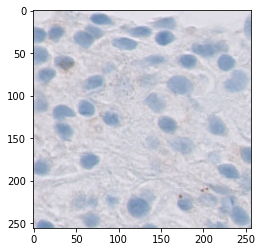

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-47_001539.png
7 0


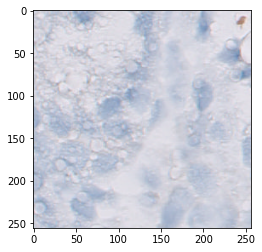

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-311_000002.png
12 5


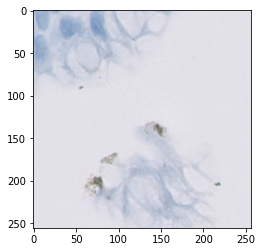

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-157_000111.png
7 6


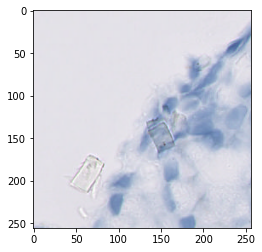

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-300_000148.png
2 0


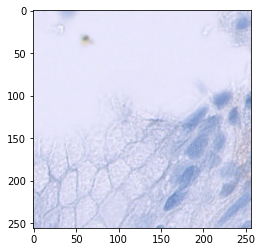

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-51_000242.png
10 6


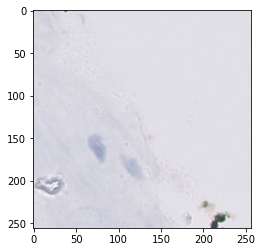

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-51_000317.png
7 3


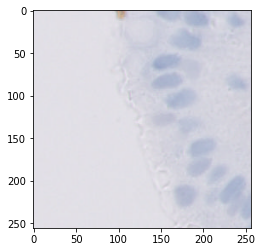

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-174_000245.png
1 0


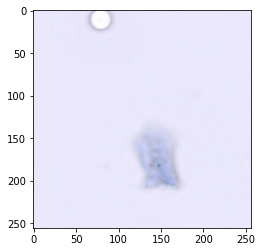

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-151_000002.png
38 0


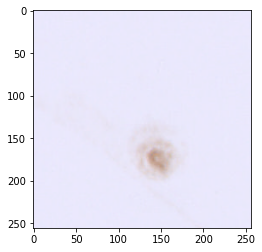

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-151_003312.png
1 0


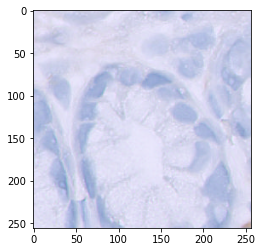

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-276_000776.png
1 0


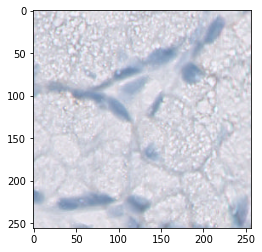

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-276_001019.png
24 7


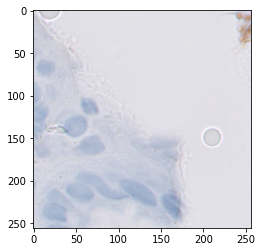

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-276_000162.png
4 1


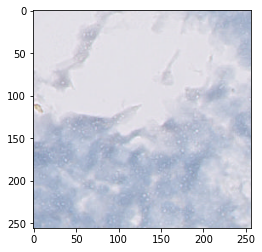

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-27_000200.png
1 0


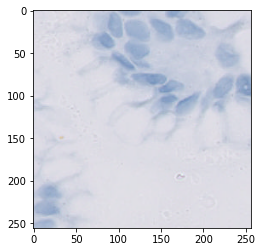

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-172_000101.png
3 0


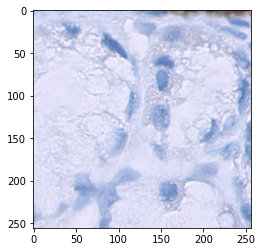

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-312_000000.png
4 1


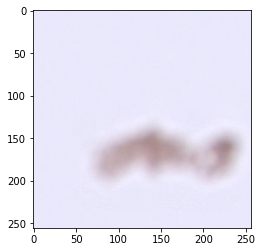

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-74_000415.png
17 0


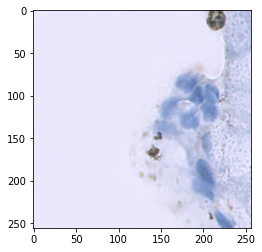

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-74_000420.png
18 0


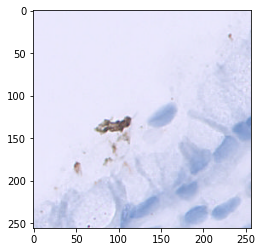

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-253_002398.png
2 0


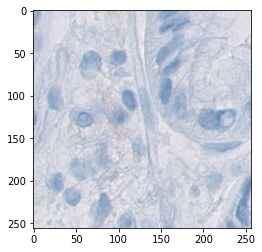

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-218_001754.png
11 0


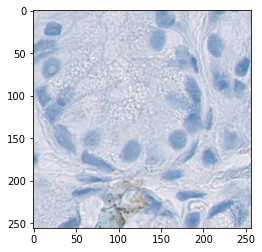

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-138_000978.png
74 3


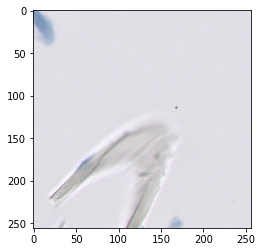

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-138_001627.png
6 1


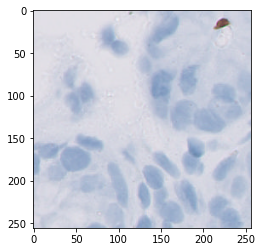

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-138_001678.png
1 0


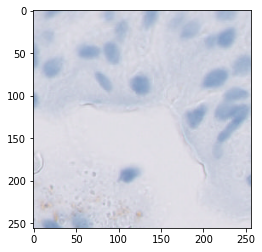

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-138_000561.png
2 1


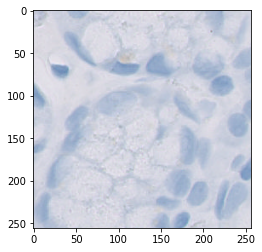

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-138_001448.png
11 2


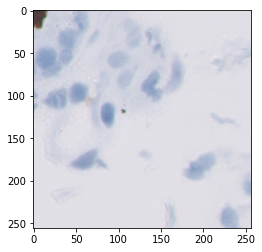

/tmp/ipykernel_372838/1225258420.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if window_metadata.loc[window_metadata["ID"] == str(dir.split("/")[-1])+"."+file[:-4], "Presence"].values == -1:
/tmp/ipykernel_372838/1225258420.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif window_metadata.loc[window_metadata["ID"] == str(dir.split("/")[-1])+"."+file[:-4], "Presence"].values == 0:


/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-141_000290.png
1 0


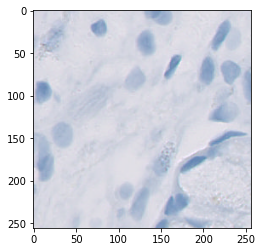

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-258_000729.png
11 10


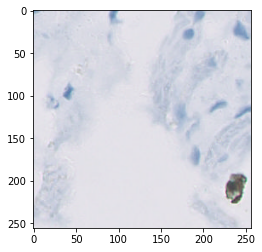

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_000957.png
471 5


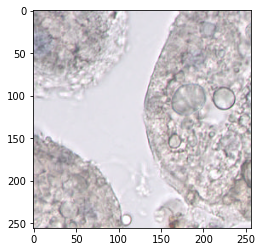

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_000776.png
642 14


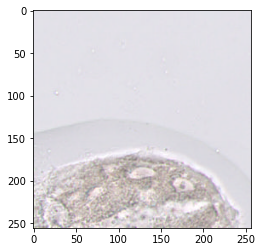

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_001020.png
2 0


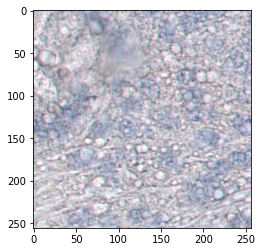

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_001449.png
39 0


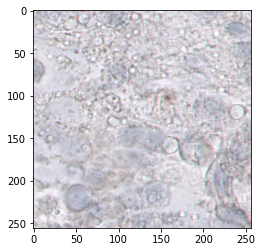

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_000946.png
64 1


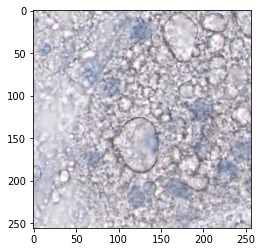

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_000783.png
540 2


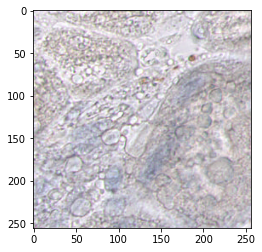

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_001292.png
173 1


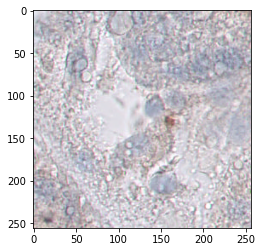

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_001140.png
17 0


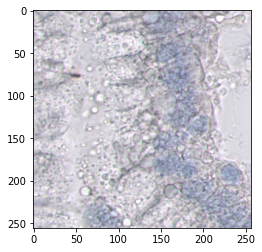

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_000835.png
1499 30


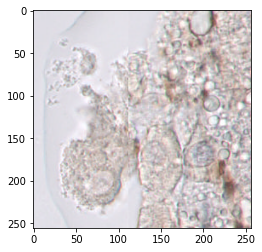

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_001034.png
8 0


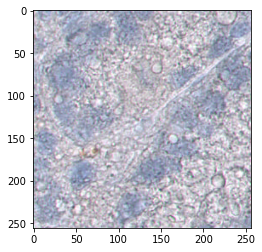

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_001085.png
138 0


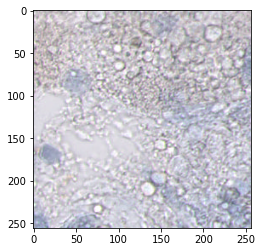

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_000731.png
476 5


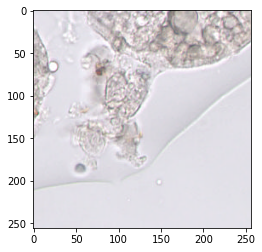

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-302_001043.png
1 0


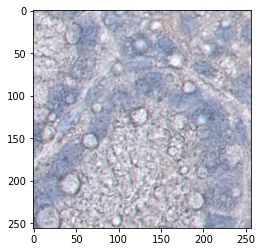

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-46_000943.png
4 0


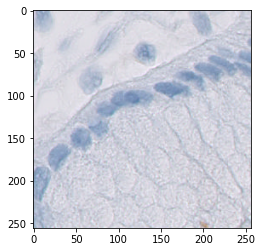

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-280_000806.png
21 16


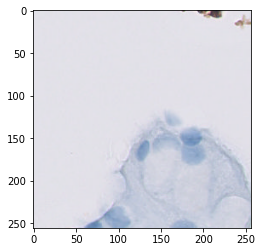

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-155_003834.png
3 0


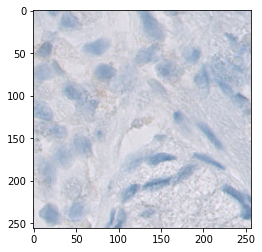

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-155_002353.png
3 0


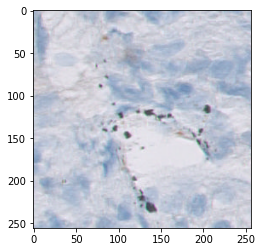

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-68_000290.png
1 0


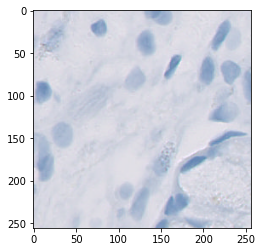

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-241_000498.png
4 0


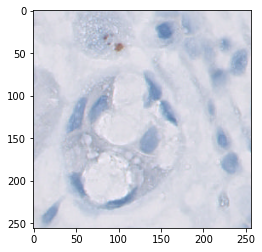

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-241_001589.png
4 0


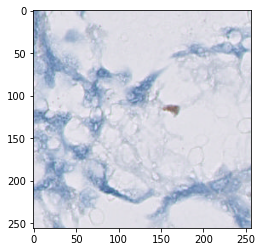

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-250_001277.png
1 0


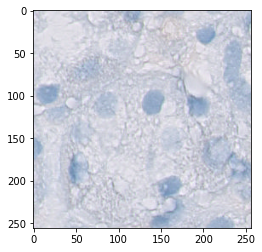

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-250_001276.png
1 0


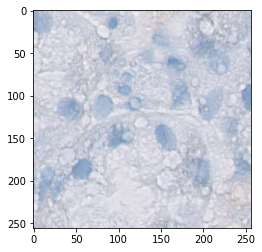

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-250_001280.png
2 0


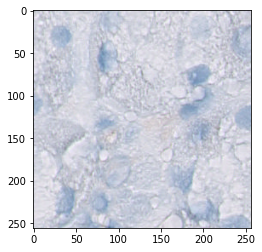

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-250_001753.png
8 1


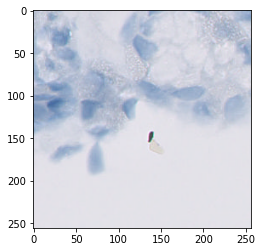

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-250_002869.png
1 0


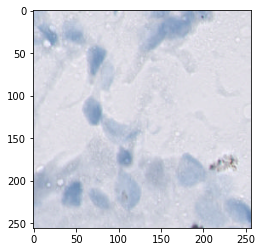

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-250_001408.png
23 2


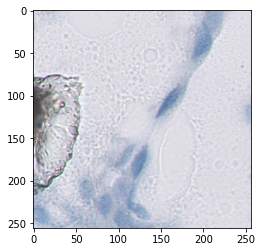

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-250_001122.png
1 0


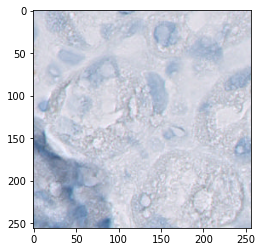

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-250_002868.png
3 0


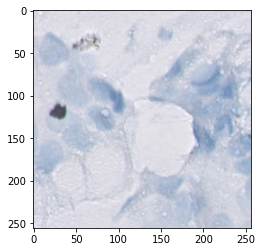

/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-250_001121.png
1 0


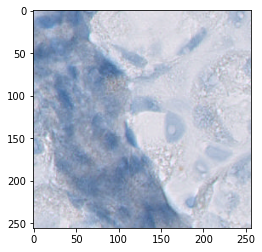

In [6]:
target_patch = []
val_ppatch = []
props = []
eps = 0.0001

for dir in directories:

    files = os.listdir(dir)
    if len(files) == 0:
        continue
    predict_patches = 0

    for file in files:
        if window_metadata.loc[window_metadata["ID"] == str(dir.split("/")[-1])+"."+file[:-4], "Presence"].values == -1:
            target_pat = 0
        elif window_metadata.loc[window_metadata["ID"] == str(dir.split("/")[-1])+"."+file[:-4], "Presence"].values == 0:
            continue
        else:
            target_pat = 1
        target_patch.append(target_pat)
        img = read_img(file, dir)
        model.eval()
        img_processed = model(img, "autoencoder")
        red_pixels_original = red_pixels(transform_un(img))
        red_pixels_output = red_pixels(transform_un(img_processed))
        prop = (red_pixels_original+eps)/(red_pixels_output+eps)
        if (red_pixels_original+eps)/(red_pixels_output+eps) > 1:
            if target_pat == 0:
                    print(dir+file)
                    print(red_pixels_original, red_pixels_output)
                    plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(dir, file)), cv2.COLOR_BGR2RGB))
                    plt.show()
            val_ppatch.append(1)
        else:
            val_ppatch.append(0)
        
        props.append(prop)

1
Confusion matrix patches:
[[1035   56]
 [  15  149]]


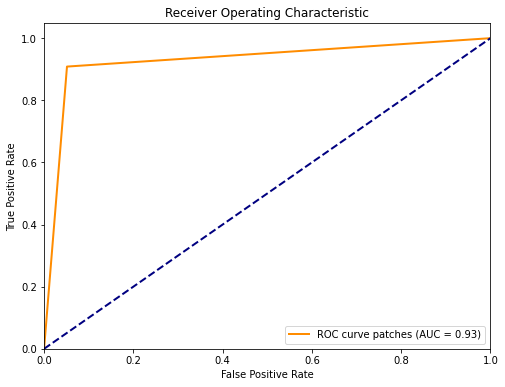

In [6]:
results_patches = pd.DataFrame({"Target": target_patch, "Predicted": val_ppatch})
fpr, tpr, thresholds = roc_curve(results_patches['Target'], results_patches['Predicted'])
roc_auc = auc(fpr, tpr)
plot_auc(fpr, tpr, roc_auc)
J2 = tpr - fpr
best_threshold = thresholds[np.argmax(J2)]
print(best_threshold)

confusion_matrix2 = metrics.confusion_matrix(target_patch, val_ppatch)

# Print the confusion matrix
print("Confusion matrix patches:")
print(confusion_matrix2)

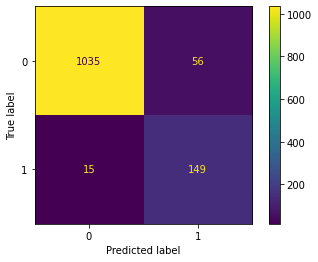

In [11]:
plot_confusion_matrix(target_patch, val_ppatch, '/fhome/mapsiv01/PSIV3_malaltia/autoencoder/plots', 'CM_bl_patch.png')

In [47]:
recall_score(target_patch, val_ppatch), accuracy_score(target_patch, val_ppatch), precision_score(target_patch, val_ppatch)

(0.9085365853658537, 0.9434262948207172, 0.7268292682926829)

In [48]:
len(target_patch), len(props)

(1255, 1255)

1.0825687694638673
Confusion matrix patches:
[[1035   56]
 [  15  149]]


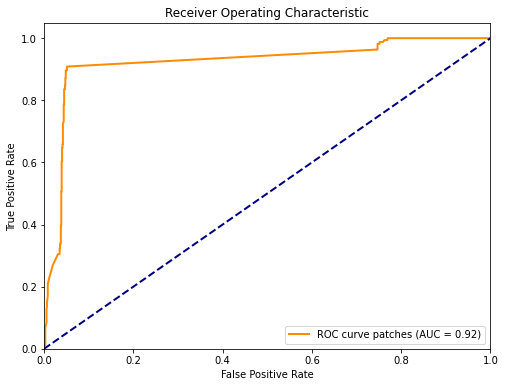

In [13]:
results_patches = pd.DataFrame({"Target": target_patch, "Predicted": props})
fpr, tpr, thresholds = roc_curve(results_patches['Target'], results_patches['Predicted'])
roc_auc = auc(fpr, tpr)
plot_auc(fpr, tpr, roc_auc)
J2 = tpr - fpr
best_threshold = thresholds[np.argmax(J2)]
print(best_threshold)

predicted_labels = [0 if p < best_threshold else 1 for p in results_patches['Predicted']]

confusion_matrix2 = metrics.confusion_matrix(target_patch, predicted_labels)

# Print the confusion matrix
print("Confusion matrix patches:")
print(confusion_matrix2)

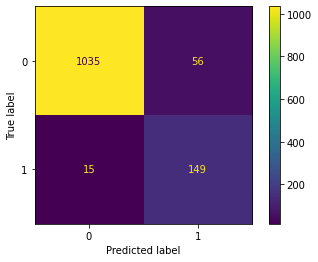

In [14]:
plot_confusion_matrix(target_patch, val_ppatch, '/fhome/mapsiv01/PSIV3_malaltia/autoencoder/plots', 'CM_bl_patch') 

In [16]:
recall_score(target_patch, val_ppatch), accuracy_score(target_patch, val_ppatch), precision_score(target_patch, val_ppatch), f1_score(target_patch, val_ppatch)

(0.9085365853658537,
 0.9434262948207172,
 0.7268292682926829,
 0.8075880758807589)

## PREDICT PACIENTS

In [56]:
props = []
targets = []
eps = 0.0001
n = 20

for dir in directories_cr:
    if metadata.loc[metadata["CODI"] == dir.split("/")[-1].split("_")[0], "DENSITAT"].values[0] == "BAIXA":
        continue
        target = 1
    if metadata.loc[metadata["CODI"] == dir.split("/")[-1].split("_")[0], "DENSITAT"].values[0] == "NEGATIVA":
        target = 0
    else:
        target = 1

    files = os.listdir(dir)
    if len(files) > n:
            files = files[:n]

    predict_patches = 0
    patches_seen = 0

    for file in files:
        if window_metadata.loc[window_metadata["ID"] == str(dir.split("/")[-1])+"."+file[:-4], "Presence"].values == 0:
            continue
        patches_seen += 1
        img = read_img(file, dir)
        model.eval()
        img_processed = model(img, "autoencoder")
        red_pixels_original = red_pixels(transform_un(img))
        red_pixels_output = red_pixels(transform_un(img_processed))

        if (red_pixels_original+eps)/(red_pixels_output+eps) > 1.0:
                predict_patches += 1
    
    if patches_seen != 0:
        prop = predict_patches/patches_seen
        
        targets.append(target)
        props.append(prop)

/tmp/ipykernel_3528986/496519047.py:23: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if window_metadata.loc[window_metadata["ID"] == str(dir.split("/")[-1])+"."+file[:-4], "Presence"].values == 0:


In [57]:
results_patches = pd.DataFrame({"Target": targets, "Predicted": props})

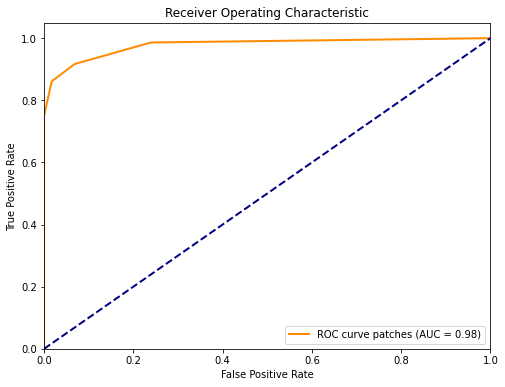

In [58]:
fpr, tpr, thresholds = roc_curve(results_patches['Target'], results_patches['Predicted'])
roc_auc = auc(fpr, tpr)
plot_auc(fpr, tpr, roc_auc)

In [59]:
J2 = tpr - fpr
best_threshold = thresholds[np.argmax(J2)]
print(best_threshold)

predicted_labels = [0 if prob < best_threshold else 1 for prob in props]
confusion_matrix2 = metrics.confusion_matrix(targets, predicted_labels)

# Print the confusion matrix
print("Confusion matrix patches:")
print(confusion_matrix2)

0.1
Confusion matrix patches:
[[109   8]
 [  6  66]]


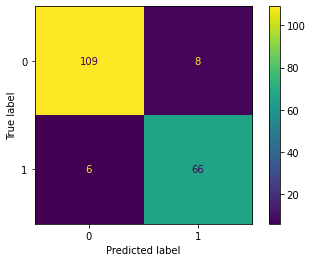

In [60]:
plot_confusion_matrix(targets, predicted_labels, '/fhome/mapsiv01/PSIV3_malaltia/autoencoder/plots', 'CM_bl_pac') 

In [61]:
len(targets)

189

In [62]:
recall_score(targets, predicted_labels), accuracy_score(targets, predicted_labels), precision_score(targets, predicted_labels), f1_score(targets, predicted_labels)

(0.9166666666666666,
 0.9259259259259259,
 0.8918918918918919,
 0.9041095890410958)